In [20]:
### load the data
import pandas as pd
import numpy as np
df = pd.read_csv('autos.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio hor

In [21]:
df = df.replace('?', np.nan)

In [22]:
df.isnull().sum() # how many nulls there are in each column

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [23]:
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (159, 26)


In [24]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [91]:
df = df.drop(columns=['symboling', 'normalized_losses'])

In [92]:
df.make = df.make.astype('category').cat.codes
df.fuel_type = df.fuel_type.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.num_of_doors = df.num_of_doors.astype('category').cat.codes
df.body_style = df.body_style.astype('category').cat.codes
df.drive_wheels = df.drive_wheels.astype('category').cat.codes
df.engine_type = df.engine_type.astype('category').cat.codes
df.num_of_cylinders = df.num_of_cylinders.astype('category').cat.codes
df.fuel_system = df.fuel_system.astype('category').cat.codes
df.bore = df.bore.astype('category').cat.codes
df.stroke = df.stroke.astype('category').cat.codes
df.horsepower = df.horsepower.astype('category').cat.codes
df.peak_rpm = df.peak_rpm.astype('category').cat.codes
df.price = df.price.astype('category').cat.codes

In [111]:
# train test split
from sklearn.model_selection import train_test_split

X = df.iloc[:,9]
y = df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (127,)
test size: (32,)


In [112]:
x = (X_train - X_train.mean()) / X_train.std()
x = np.c_[np.ones(X_train.shape[0]), x] 

In [122]:
lr = 0.1 
iterations = 500
num_points = y_train.size 
np.random.seed(123)
theta = np.random.rand(2)

def gradient_descent(x, y_train, theta, iterations, lr):
    costs = []
    thetas = [theta] # prev thetas
    for i in range(iterations):
        pred = np.dot(x, theta)
        error = pred - y_train
        cost = 1/(2*num_points) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (lr * (1/num_points) * np.dot(x.T, error))
        thetas.append(theta)
    return thetas, costs
thetas, costs = gradient_descent(x, y_train, theta, iterations, lr)
theta = thetas[-1]

print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 53.84, 0.77


In [124]:
import numpy as np
from sklearn.metrics import mean_squared_error
def gradient_descent(x, y_train, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    m, b = 0.33, 0.48 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

In [126]:
m, b, log, mse = gradient_descent(x, y_train)
print(log)

[(208.7619513207547, 3.6568880503144645), (-89398.64780194464, -1360.9548205016256), (38433899.87145845, 585303.1308569987), (-16523193465.305252, -251628611.66594315), (7103518742859.003, 108178153721.98384), (-3053887774999851.0, -46507083761020.9), (1.3129029259858086e+18, 1.999395224957638e+16), (-5.64432690412856e+20, -8.595639507575107e+18), (2.4265637291308666e+23, 3.69536836048768e+21), (-1.0432088062132875e+26, -1.5886831116706274e+24)]


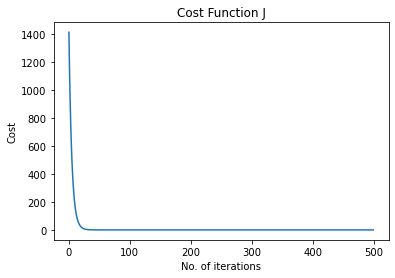

In [123]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

In [38]:
import sympy as sy
beta0, beta1, xi, yi = sy.symbols('beta_0, beta_1, x_i, y_i')

In [39]:
cost = (yi - (b0 + b1*xi))**2

In [40]:
sy.diff(cost, b0)

2*beta_0 + 2*beta_1*x_i - 2*y_i

In [41]:
sy.diff(cost, b1)

-2*x_i*(-beta_0 - beta_1*x_i + y_i)

In [59]:
x = df.width.to_numpy()
y = df.length.to_numpy()

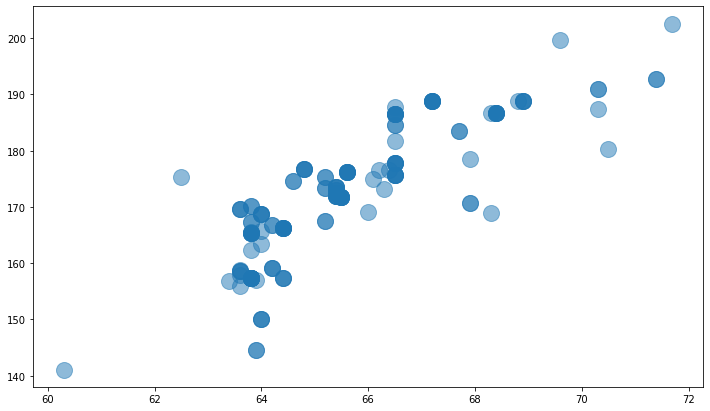

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.scatter(x,y,s=256, alpha=.5, label='Y')

In [109]:
b0, b1 = 0.0, 1.0

lr = 0.001
epochs = 100
error = []

# run 10000 times
for epoch in range(epochs):
    # initialize to 0 -> cost of epoch, Jb_0, Jb_1
    epoch_cost, cost_b0, cost_b1 = 0, 0, 0
    print(epoch)
    for i in range(len(x)):
        # make prediction
        y_train = (b0 + b1*x[i])
        # append squared error
        epoch_cost += (y[i] - y_pred)**2 
        for j in range(len(x)):
            # partial derivative of b0 and b1 for current row
            partial_wrt_b0 = -2 * (y[j] - (b0 + b1*x[j]))
            partial_wrt_b1 = (-2 * x[j]) * (y_train[j] - (b0 + b1*x[j]))
            
            # increase cost of coeffs
            cost_b0 += partial_wrt_b0
            cost_b1 += partial_wrt_b1

        # calculate new coeffs
        b0 = b0 - lr * cost_b0
        b1 = b1 - lr * cost_b1
        
    # keep track of errors - for visualization purposes
    error.append(epoch_cost)

0


KeyError: 0

In [64]:
b0

nan

In [65]:
b1

nan